**Imports**

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import time

**Load Dataset: MNIST**

In [0]:
IMG_CHANNELS = 1; IMG_ROWS = 28; IMG_COLS = 28;

#constant
BATCH_SIZE = 128; NB_EPOCH = 50; NB_CLASSES = 10; VERBOSE = 1; VALIDATION_SPLIT = 0.2;

#load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], IMG_ROWS, IMG_COLS, 1)
X_test = X_test.reshape(X_test.shape[0], IMG_ROWS, IMG_COLS, 1)

(OPTIONAL) **Load Dataset:** **CIFAR10**

In [0]:
# CIFAR_10 is set of 60K images 32x32 pixels, 3 channels
#IMG_CHANNELS = 3; IMG_ROWS = 32; IMG_COLS = 32;

#constant
#BATCH_SIZE = 128; NB_EPOCH = 50; NB_CLASSES = 10; VERBOSE = 1; VALIDATION_SPLIT = 0.2;

#load dataset
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
# Check DataSet statistics
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

# float
X_train = X_train.astype('float32'); X_test = X_test.astype('float32');

# normalization (for CIFAR10)
#X_train /= 255; X_test /= 255;


**VGG16 CNN Model**

In [8]:
model = Sequential()

# Convolutional Layer1 and Pooling Layer1
model.add(ZeroPadding2D((1,1), input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Convolutional Layer2 and Pooling Layer2
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 128, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 128, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Convolutional Layer3 and Pooling Layer3
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 256, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 256, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 256, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Convolutional Layer4 and Pooling Layer4
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Convolutional Layer5 and Pooling Layer5
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))  # Uncomment this when using CIFAR10 DataSet and comment the MaxPooling below
model.add(MaxPooling2D(pool_size=(1,1), strides=(2,2)))

# FC Layers
model.add(Flatten())
#top layer of the VGG net
model.add(Dense(units = 4096, activation='relu')); model.add(Dropout(0.5))
model.add(Dense(units = 4096, activation='relu')); model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 16, 16, 64)        0         
______________________________________

**Training**

In [9]:
start_time = time.time()

#================================================================================================
## Training

model.compile(loss= tf.keras.losses.CategoricalCrossentropy(), optimizer='sgd', metrics=['accuracy'])


history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

#================================================================================================
## Testing
print('Testing...')
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0]); print('Test accuracy:', score[1]);

# save model
model_json = model.to_json()
open('architecture_VGG16.json', 'w').write(model_json)
model.save_weights('weights_VGG16.h5', overwrite=True)

# list all data in history
print(history.history.keys()); print(history.history)


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 44s 919us/step - loss: 2.2995 - accuracy: 0.1151 - val_loss: 2.2944 - val_accuracy: 0.1060
Epoch 2/50
48000/48000 [==============================] - 36s 759us/step - loss: 2.2376 - accuracy: 0.2045 - val_loss: 1.4387 - val_accuracy: 0.5782
Epoch 3/50
48000/48000 [==============================] - 36s 760us/step - loss: 0.7218 - accuracy: 0.7568 - val_loss: 0.2183 - val_accuracy: 0.9333
Epoch 4/50
48000/48000 [==============================] - 37s 761us/step - loss: 0.1744 - accuracy: 0.9471 - val_loss: 0.1322 - val_accuracy: 0.9592
Epoch 5/50
48000/48000 [==============================] - 36s 760us/step - loss: 0.1029 - accuracy: 0.9685 - val_loss: 0.1028 - val_accuracy: 0.9689
Epoch 6/50
48000/48000 [==============================] - 36s 759us/step - loss: 0.0743 - accuracy: 0.9771 - val_loss: 0.0687 - val_accuracy: 0.9798
Epoch 7/50
48000/48000 [==============================]

**PLot**

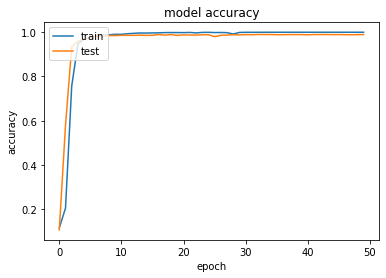

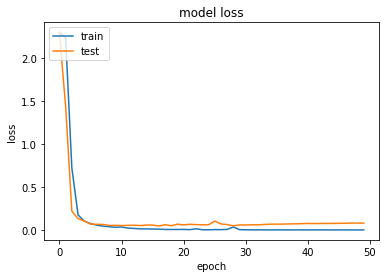


Execution Time 1861.9940462112427 seconds: 


In [10]:
# summarize history for accuracy
plt.plot(history.history['accuracy']); plt.plot(history.history['val_accuracy']);
plt.title('model accuracy'); plt.ylabel('accuracy'); plt.xlabel('epoch'); 
plt.legend(['train', 'test'], loc='upper left'); plt.show()

# summarize history for loss
plt.plot(history.history['loss']); plt.plot(history.history['val_loss']);
plt.title('model loss'); plt.ylabel('loss'); plt.xlabel('epoch');
plt.legend(['train', 'test'], loc='upper left'); plt.show()
print(); print("Execution Time %s seconds: " % (time.time() - start_time))